# Пример кластеризации

## Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Загружаем данные

In [2]:
raw = pd.read_csv('Countries_exercise.csv')
raw

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [3]:
data = raw.copy()

## Визуализируем данные

На графике колонки долготы и широты.

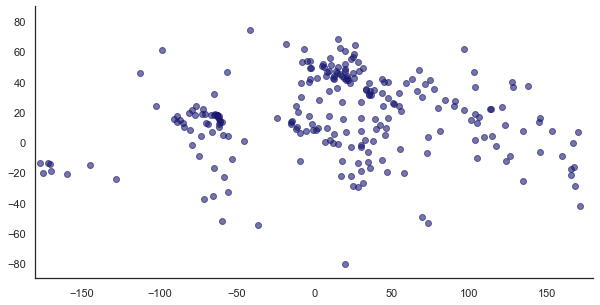

In [4]:
sns.set_style('white')
plt.figure(figsize = (10,5))
plt.scatter(data['Longitude'],
            data['Latitude'],
            alpha = 0.6,
            color = 'midnightblue')
plt.ylim(-90,90)
plt.xlim(-180,180)
sns.despine()
plt.show()

## Выбираем фичи на базе которых будет производиться кластеризация

Оставляем только столбцы широты и долготы.

In [5]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Кластерзация

Используем метод локтя для определения оптимального количества кластеров

1. Рассичтаем общий WCSS и для каждого из возмоного количества кластеров

Отдельный для каждого возможного количества кластеров, допустим максимальное количество 15

In [6]:
wcss = []

for i in range(1,16):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

## Изобразим модель локтя 

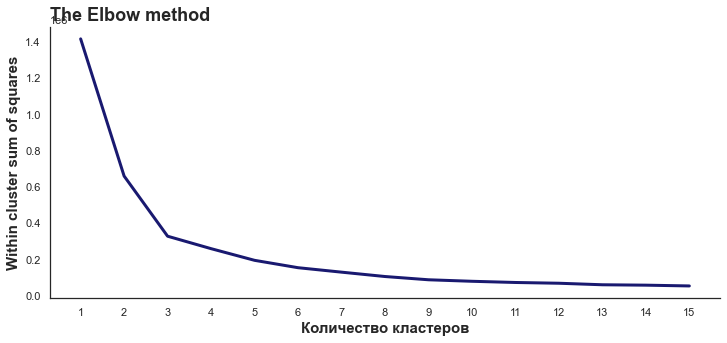

In [7]:
num_cluster = range(1,16)
plt.figure(figsize = (12,5))
plt.plot(num_cluster,
         wcss, 
         color = 'midnightblue',
         lw = 3)
plt.xticks(ticks=num_cluster)
plt.title("The Elbow method",
          fontsize = 18,
          fontweight = 'bold',
          loc = 'left')
plt.xlabel('Количество кластеров',
            fontsize = 15,
            fontweight = 'bold')
plt.ylabel('Within cluster sum of squares',
            fontsize = 15,
            fontweight = 'bold')
sns.despine()
plt.show()

Согласно модели, оптимальное количество кластеров от 2 до 4. Возьмем среднее - 3 с наибольшим переломом.

In [8]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.inertia_ #WCSS для данной модели

325235.52237055893

In [10]:
clusters = kmeans.fit_predict(x)
clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

## Добавляем столбец кластер

In [11]:
data['Cluster'] = clusters
data

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


## Визуализируем

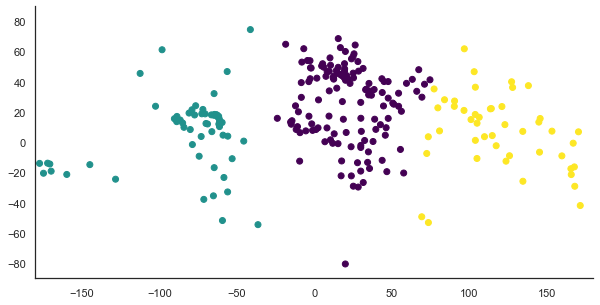

In [12]:
sns.set_style('white')
plt.figure(figsize = (10,5))
plt.scatter(data['Longitude'],
            data['Latitude'],
            c=data['Cluster'],
            cmap='viridis')
plt.xlim(-180,180)
plt.ylim(-90,90)
sns.despine()
plt.show()